In [13]:
import os
import cv2  # open computer vision to: load images and process images
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  # going to use the machine learning part

In [14]:
# to load the datasets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)  # to train the data itself
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))



model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)
# Sauvegarder le modèle dans un fichier 'maModel.model'
model.save('maModel.model')



# Charger le modèle à partir du fichier 'maModel.model'
model = tf.keras.models.load_model('maModel.model')

# Variable pour stocker le numéro de l'image que vous souhaitez prédire
image_nu = 1

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3173 - accuracy: 0.9114
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1428 - accuracy: 0.9581
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0977 - accuracy: 0.9709
INFO:tensorflow:Assets written to: maModel.model\assets


INFO:tensorflow:Assets written to: maModel.model\assets


In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Afficher l'accuracy
print(f'Accuracy sur l\'ensemble de test : {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1115 - accuracy: 0.9680
Accuracy sur l'ensemble de test : 96.80%


1/1 [==============================] - 0s 154ms/step
This image is probably a 7


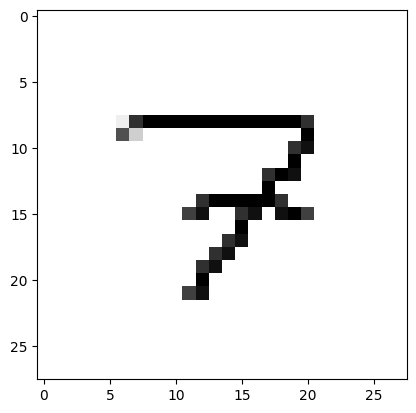

1/1 [==============================] - 0s 36ms/step
This image is probably a 2


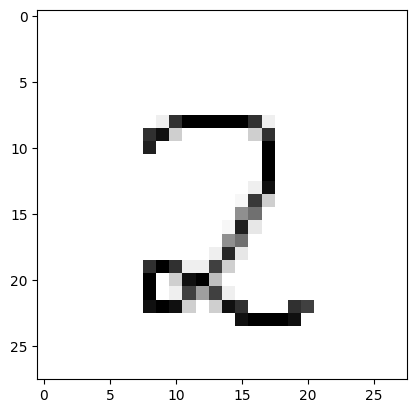

1/1 [==============================] - 0s 30ms/step
This image is probably a 9


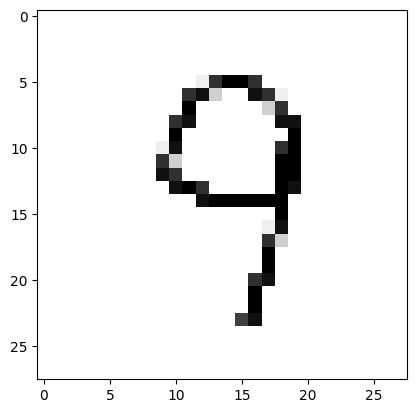

1/1 [==============================] - 0s 27ms/step
This image is probably a 8


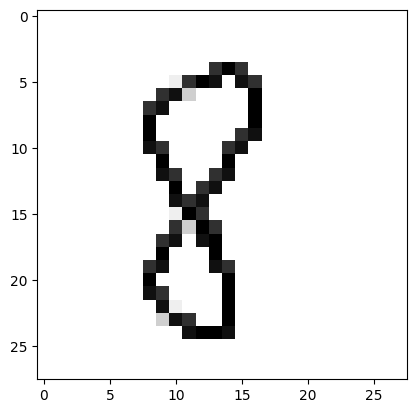

1/1 [==============================] - 0s 29ms/step
This image is probably a 5


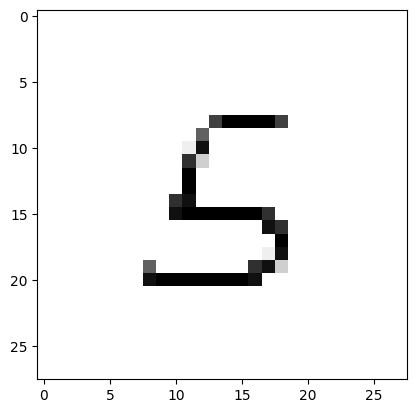

In [16]:
#parcourire le model pour faire des predictions
while os.path.isfile(f"digits/digit{image_nu}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_nu}.png")[:, :, 0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This image is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_nu += 1